K.Gnana Varshita
20MIS0141

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


Univariatecanalysis

In [ ]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


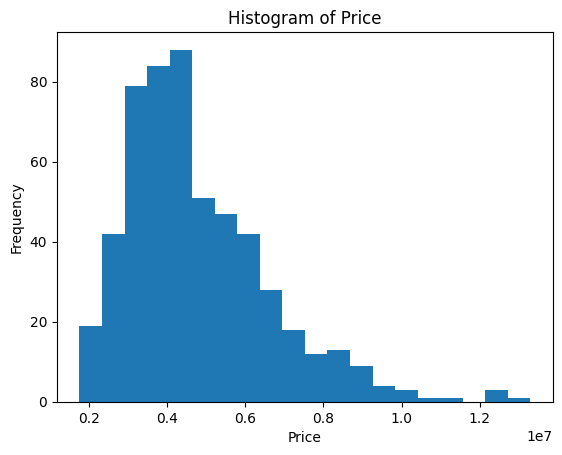

In [ ]:
# Histogram of a numerical variable
df['price'].plot(kind='hist',bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

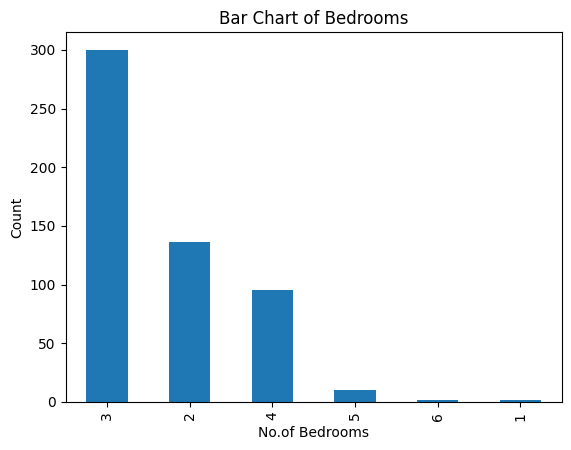

In [ ]:
# Bar chart of a categorical variable
df['bedrooms'].value_counts().plot(kind='bar')
plt.xlabel('No.of Bedrooms')
plt.ylabel('Count')
plt.title('Bar Chart of Bedrooms')
plt.show()


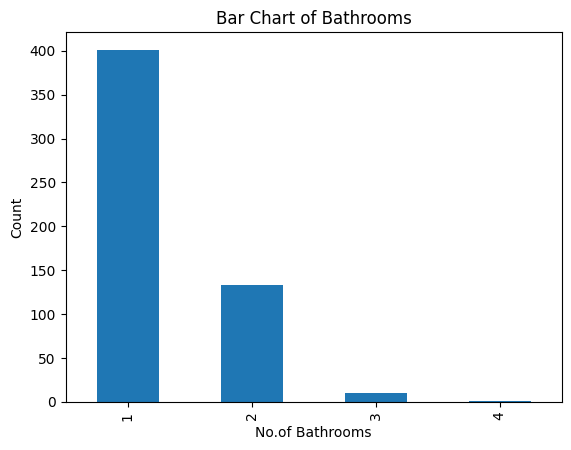

In [ ]:
# Bar chart of a categorical variable
df['bathrooms'].value_counts().plot(kind='bar')
plt.xlabel('No.of Bathrooms')
plt.ylabel('Count')
plt.title('Bar Chart of Bathrooms')
plt.show()


Bivariate Analysis

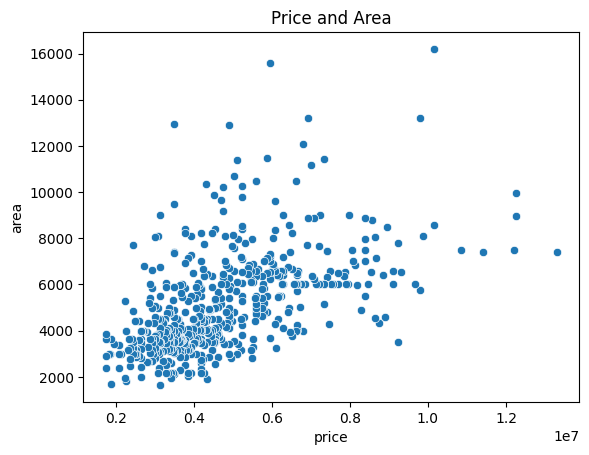

In [ ]:
sns.scatterplot(data=df, x='price', y='area')
plt.xlabel('price')
plt.ylabel('area')
plt.title('Price and Area')
plt.show()

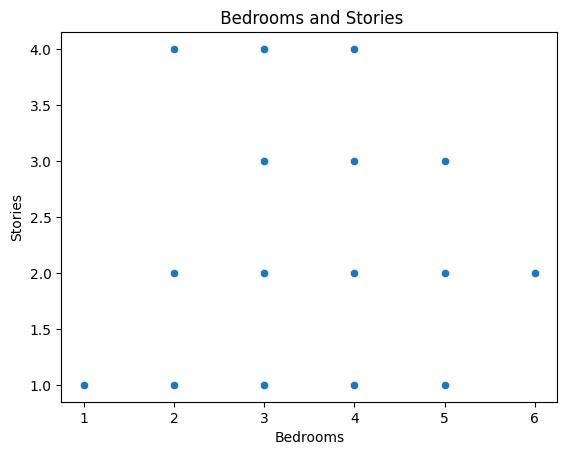

In [ ]:
sns.scatterplot(data=df, x='bedrooms', y='stories')
plt.xlabel('Bedrooms')
plt.ylabel('Stories')
plt.title(' Bedrooms and Stories')
plt.show()

This graph shows how variables and related to each other

<ipython-input-45-db4ce455d921>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm= df.corr()


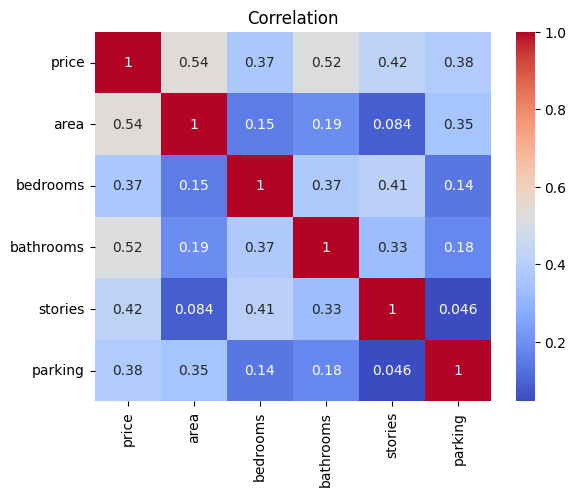

In [ ]:


cm= df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

Multivariate Analysis

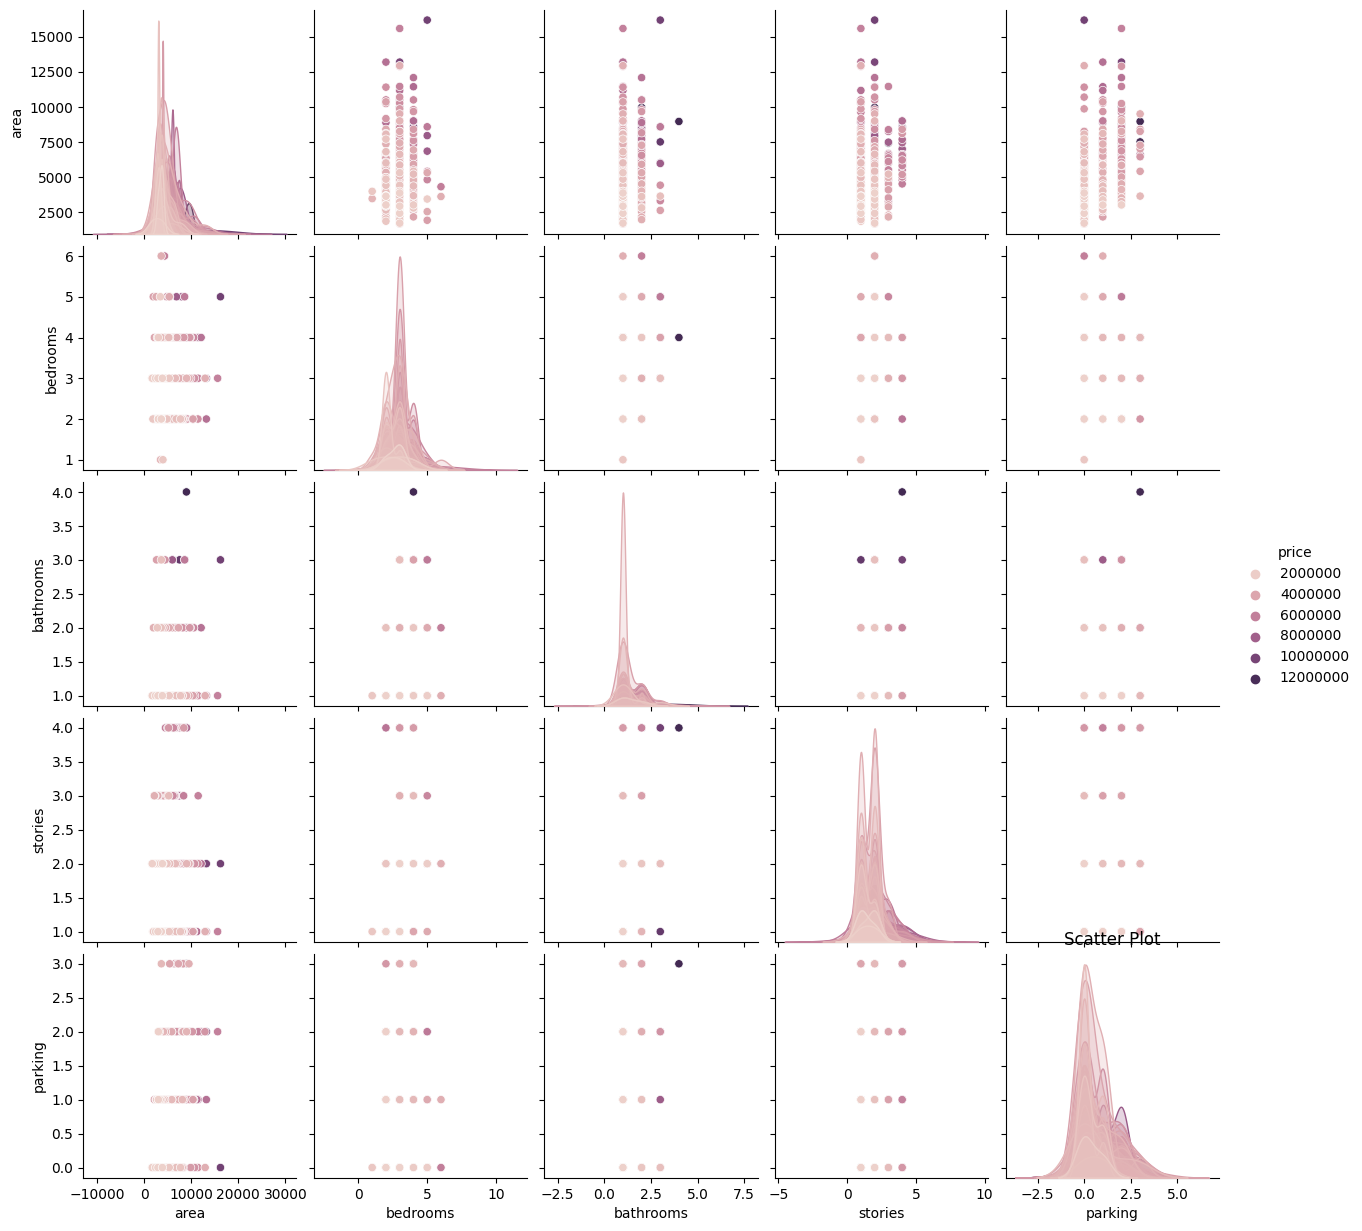

In [ ]:
sns.pairplot(data=df, vars=['area',	'bedrooms',	'bathrooms','stories'	,'parking'], hue='price')
plt.title('Scatter Plot')
plt.show()

Finding Null values

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

There are no null values in the dataset

In [ ]:
z_score_threshold = 3
z_scores = np.abs((df - df.mean()) / df.std())

<ipython-input-48-df27736f6c86>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())
<ipython-input-48-df27736f6c86>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())


In [ ]:
outliers = (z_scores > z_score_threshold)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform encoding for each categorical column
for column in categorical_columns:
    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the column
    df[column] = label_encoder.fit_transform(df[column])

# Print the encoded DataFrame
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  furnishingstatus  
0           0                0    

In [ ]:
X = df.drop("price", axis=1)
y = df["price"]


print(X.head())




   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  furnishingstatus  
0                0                1        2                 0  
1                0                1        3                 0  
2                0                0        2                 1  
3                0                1        3                 0  
4                0                1        2                 0  


In [ ]:
print(y.head())

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [ ]:
y.tail()

540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your independent variable matrix and y is your dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print("Training Data:")
print("X_train:", X_train)
print("y_train:", y_train)
print()

print("Testing Data:")
print("X_test:", X_test)
print("y_test:", y_test)

Training Data:
X_train:      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
412  2610         3          1        2         1          0         1   
284  7770         2          1        1         1          0         0   
504  3185         2          1        1         1          0         0   
209  6720         3          1        1         1          0         0   
269  3900         3          1        2         1          0         0   
..    ...       ...        ...      ...       ...        ...       ...   
299  7000         3          1        1         1          0         0   
534  3000         4          1        2         1          0         0   
493  3960         3          1        1         1          0         0   
527  1836         2          1        1         0          0         1   
168  4260         4          1        2         1          0         1   

     hotwaterheating  airconditioning  parking  furnishingstatus  
412                0

Model loading

In [ ]:
from xgboost import XGBRegressor
model=XGBRegressor()

In [ ]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
from sklearn import metrics

In [ ]:
training_data_prediction=model.predict(X_train)

In [ ]:
print(training_data_prediction)

[ 3428785.   4254668.   2646649.2  4789084.5  4191975.5  6995762.5
  2882858.   2712855.5  6927478.5  4754850.   3324535.   2912886.5
  6020293.   5795164.   7660623.5  4136626.   5221310.5  4609296.5
  7685499.   4198651.   4182815.   2697859.5  5275676.5  4392887.
  3899349.2  4019543.   6768486.   9174467.   4607862.   3169246.
  3753538.8  3092020.2  2498273.2  4090106.2  4208317.   2870133.
  4867783.   3700453.8  1921260.2  8004078.   4095939.  12204448.
  8495260.   7391056.5  4038205.5  3196609.5  4247299.5  3612142.8
  3398956.8  2469838.8  5861677.5  4120390.8  3839550.   3264744.2
  4116378.5  5315802.   3675644.5  3802290.   3615036.2  4194379.
  7490758.5  4305581.   6076244.   2820750.8  3843385.8  5473191.
  6556469.   5874958.5  5454321.   5519656.   3283011.   3623974.8
  2827535.5  4853107.5  5246549.5  3699406.5  5840307.   4184965.
  6664819.   5393886.5  3146605.8  3567997.   6575001.   4914005.
  5875862.5  8401132.   2676063.   3317082.5  9790778.   4100764.8
  3

Using evaluation metrics

In [ ]:
score1=metrics.r2_score(y_train,training_data_prediction)

In [ ]:
score2=metrics.mean_absolute_error(y_train,training_data_prediction)

In [ ]:
print("R_squares error:",score1)

R_squares error: 0.9969419772374681


In [ ]:
print("Mean_absolute error:",score2)

Mean_absolute error: 60826.91743119266
